# Azure Cognitive Services Computer Vision Service

In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

client = ComputerVisionClient('VISION_ENDPOINT', CognitiveServicesCredentials('VISION_KEY'))

a man riding a sand dune (53.8%)


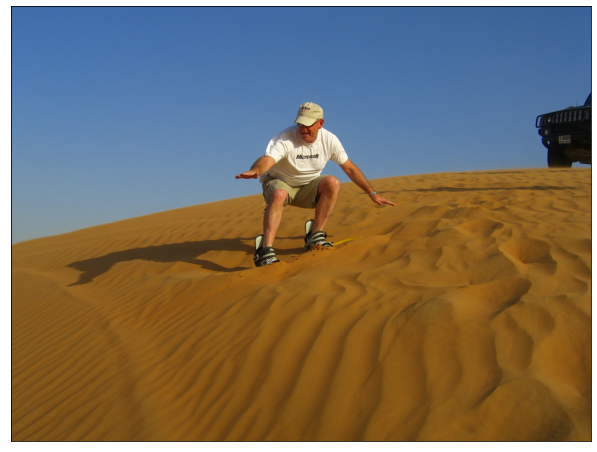

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

image = plt.imread('Data/dubai.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/dubai.jpg', mode='rb') as image:
    result = client.describe_image_in_stream(image)
    
    for caption in result.captions:
        print(f'{caption.text} ({caption.confidence:.1%})')

In [3]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.describe_image_in_stream(image)
    
    for tag in result.tags:
        print(f'{tag}')

sky
outdoor
nature
dune


In [4]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.tags])

    for tag in result.tags:
        print(f'{tag.name} ({tag.confidence:.1%})')

dune (99.5%)
sky (99.2%)
outdoor (98.7%)
clothing (98.2%)
desert (98.1%)
sand (97.9%)
aeolian landform (96.9%)
person (96.1%)
singing sand (95.8%)
erg (94.0%)
sahara (93.6%)
nature (93.4%)
footwear (90.9%)
landscape (88.0%)
sand dune (83.5%)
ground (77.5%)


In [5]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.tag_image_in_stream(image)

    for tag in result.tags:
        print(f'{tag.name} ({tag.confidence:.1%})')

dune (99.5%)
sky (99.2%)
outdoor (98.7%)
clothing (98.2%)
desert (98.1%)
sand (97.9%)
aeolian landform (96.9%)
person (96.1%)
singing sand (95.8%)
erg (94.0%)
sahara (93.6%)
nature (93.4%)
footwear (90.9%)
landscape (88.0%)
sand dune (83.5%)
ground (77.5%)


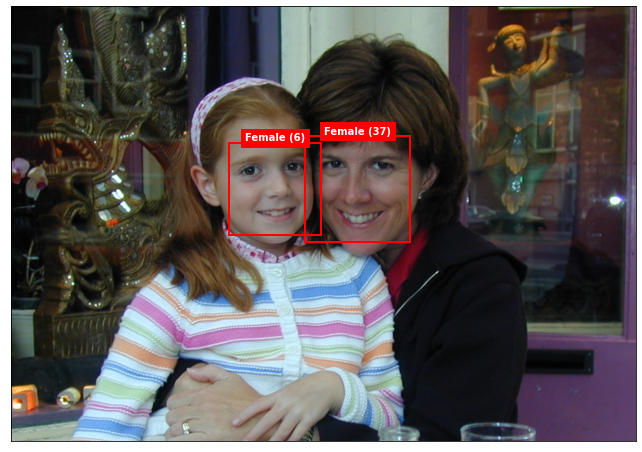

In [6]:
from matplotlib.patches import Rectangle

def annotate_face(face):
    x, y = face.face_rectangle.left, face.face_rectangle.top
    w, h = face.face_rectangle.width, face.face_rectangle.height
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)
    text = f'{face.gender} ({face.age})'
    ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

image = plt.imread('Data/amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/amsterdam.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.faces])

    for face in result.faces:
        annotate_face(face)

Adultness: 0.02214685082435608
Raciness: 0.4205135107040405
Goriness: 0.0016634463099762797
Is adult: False
Is racy: False
Is gory: False


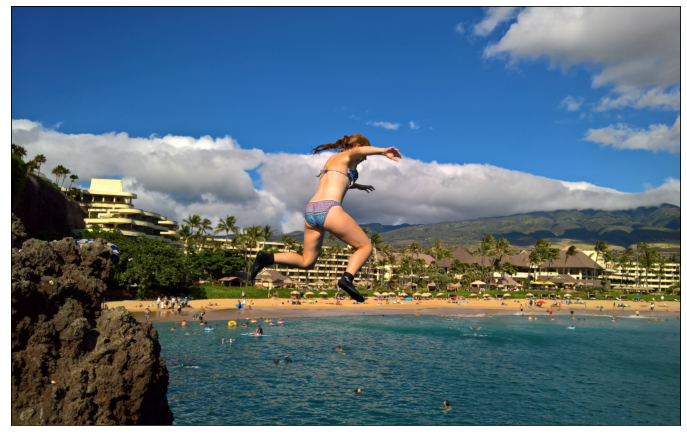

In [7]:
image = plt.imread('Data/maui.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/maui.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.adult])

    print(f'Adultness: {result.adult.adult_score}')
    print(f'Raciness: {result.adult.racy_score}')
    print(f'Goriness: {result.adult.gore_score}')
    
    print(f'Is adult: {result.adult.is_adult_content}')
    print(f'Is racy: {result.adult.is_racy_content}')
    print(f'Is gory: {result.adult.is_gory_content}')

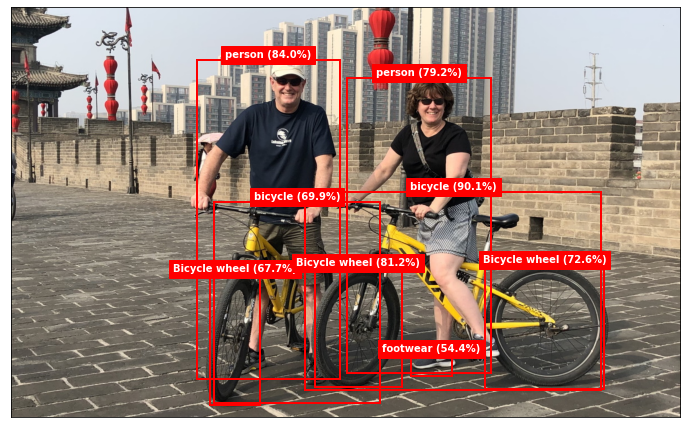

In [8]:
from matplotlib.patches import Rectangle

def annotate_object(name, confidence, bbox, min_confidence=0.5):
    if (confidence > min_confidence):
        x, y, w, h = bbox.x, bbox.y, bbox.w, bbox.h
        rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
        ax.add_patch(rect)
        text = f'{name} ({confidence:.1%})'
        ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

image = plt.imread('Data/xian.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
        
with open('Data/xian.jpg', mode='rb') as image:
    result = client.detect_objects_in_stream(image)
    
    for object in result.objects:
        annotate_object(object.object_property, object.confidence, object.rectangle)

1040-ES
20
22 Estimated Tax
o Department of the Treasury
U- Internal Revenue Service
File only if you are making a payment of estimated tax by check or money order. Mail this
voucher with your check or money order payable to "United States Treasury." Write your
social security number and "2022 Form 1040-ES" on your check or money order. Do not send
cash. Enclose, but do not staple or attach, your payment with this voucher.
4
Payment
Voucher
OMB No. 1545-0074
Calendar year—Due Jan. 17, 2023
Amount of estimated tax you are paying
by check or
money order.
loo
0
Your first name and middle initial
If joint payment, complete for spouse
Spouse's first name and middle initial
Address (number, street, and apt. no.
Your last name
Spouse's last name
City, town, or post office. If you ha e a foreign address, also complete spaces below.
State
Foreign country name
Foreign province/county
For Privacy Act and Paperwork Reduction Act Notice, see instructions.
Your social security number
Spouse's social

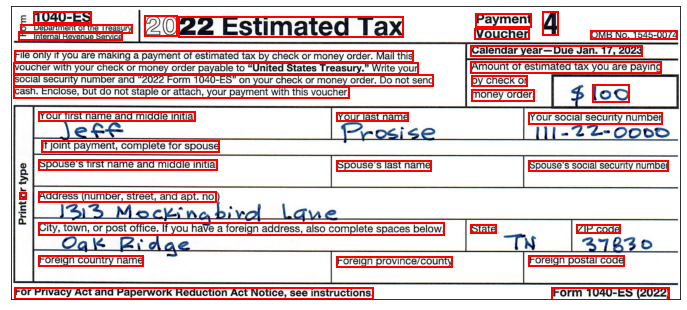

In [9]:
def draw_box(bbox):
    vals = bbox.split(',')
    x = int(vals[0])
    y = int(vals[1])
    w = int(vals[2])
    h = int(vals[3])
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

image = plt.imread('Data/1040-es.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/1040-es.jpg', mode='rb') as image:
    result = client.recognize_printed_text_in_stream(image)
    
    for region in result.regions:
        for line in region.lines:
            text = ' '.join([x.text for x in line.words])
            draw_box(line.bounding_box)
            print(text)

1040-ES
2022 Estimated Tax
Payment
4
Department of the Treasury
Voucher
Internal Revenue Service
OMB No. 1545-0074
Form
File only if you are making a payment of estimated tax by check or money order. Mail this
Calendar year-Due Jan. 17, 2023
voucher with your check or money order payable to "United States Treasury." Write your
Amount of estimated tax you are paying
social security number and "2022 Form 1040-ES" on your check or money order. Do not send
by check or
cash. Enclose, but do not staple or attach, your payment with this voucher.
money order.
$ 100
Your first name and middle initial
Jeff
Your last name
Prosise
Your social security number
111-22-0000
If joint payment, complete for spouse
Spouse's first name and middle initial
Spouse's last name
Spouse's social security number
Address (number, street, and apt. no.)
1313 Mockingbird Lane
City, town, or post office. If you have a foreign address, also complete spaces below.
State
ZIP code
Print or type
Oak Ridge
TN
37830
Foreign c

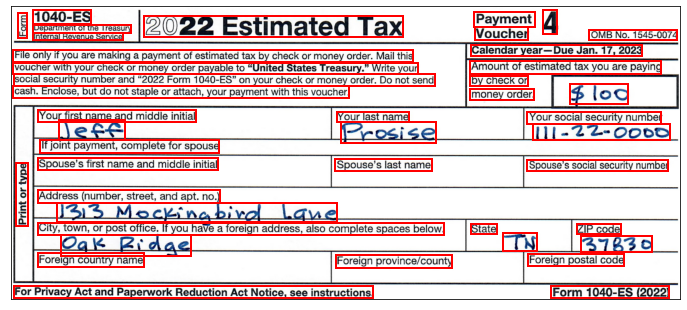

In [10]:
import time
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

def draw_box(bbox):
    x, y  = bbox[0], bbox[1]
    w = bbox[4] - x
    h = bbox[5] - y
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

image = plt.imread('Data/1040-es.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/1040-es.jpg', mode='rb') as image:
    response = client.read_in_stream(image, raw=True)
    
    location = response.headers["Operation-Location"]
    opid = location[len(location) - 36:]
    results = client.get_read_result(opid)
    
    while results.status == OperationStatusCodes.running:
        results = client.get_read_result(opid)
        time.sleep(1)
        
    if results.status == OperationStatusCodes.succeeded:
        for result in results.analyze_result.read_results:
            for line in result.lines:
                draw_box(line.bounding_box)
                print(line.text)

$ 100
Jeff
Prosise
111-22-0000
1313 Mockingbird Lane
Oak Ridge
TN
37830


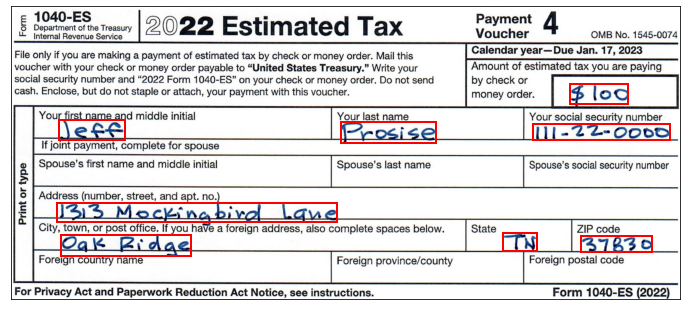

In [11]:
image = plt.imread('Data/1040-es.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/1040-es.jpg', mode='rb') as image:
    response = client.read_in_stream(image, raw=True)
    
    location = response.headers["Operation-Location"]
    opid = location[len(location) - 36:]
    results = client.get_read_result(opid)
    
    while results.status == OperationStatusCodes.running:
        results = client.get_read_result(opid)
        time.sleep(1)
        
    if results.status == OperationStatusCodes.succeeded:
        for result in results.analyze_result.read_results:
            for line in result.lines:
                if (line.appearance.style.name == 'handwriting'):
                    print(line.text)
                    draw_box(line.bounding_box)

In [12]:
from azure.cognitiveservices.vision.computervision.models import ComputerVisionErrorResponseException
from azure.core.exceptions import AzureError

try:
    with open('Data/weeping_valley.jpg', mode='rb') as image:
        result = client.describe_image_in_stream(image)

        for caption in result.captions:
            print(f'{caption.text} ({caption.confidence:.1%})')

except ComputerVisionErrorResponseException as e:
    print(e.message)
    
except AzureError as e:
    print(e.message)
    
except Exception as e:
    print(e)

(InvalidRequest) Input image is too large.
